<a href="https://colab.research.google.com/github/GoldFiiish/goldfish/blob/master/TransferLearningClassifierOnMyDataBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions



In [2]:
base_model=MobileNet(weights='imagenet',include_top=False) 
#imports the mobilenet model and discards the last 1000 neuron layer.

base_model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________

In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
preds=Dense(3,activation='softmax')(x) 

In [0]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
display(train_datagen)
train_generator=train_datagen.flow_from_directory('gdrive/My Drive/mydb', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 9 images belonging to 3 classes.


In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
9/9 [==============================] - 4s 406ms/step - loss: 3.8891 - accuracy: 0.3333
Epoch 2/50
9/9 [==============================] - 0s 25ms/step - loss: 1.0724 - accuracy: 0.4444
Epoch 3/50
9/9 [==============================] - 0s 21ms/step - loss: 1.0203 - accuracy: 0.4444
Epoch 4/50
9/9 [==============================] - 0s 21ms/step - loss: 0.6019 - accuracy: 0.7778
Epoch 5/50
9/9 [==============================] - 0s 20ms/step - loss: 0.1342 - accuracy: 1.0000
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 7/50
9/9 [==============================] - 0s 20ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 8/50
9/9 [==============================] - 0s 19ms/step - loss: 5.5237e-04 - accuracy: 1.0000
Epoch 9/50
9/9 [==============================] - 0s 19ms/step - loss: 2.2946e-04 - accuracy: 1.0000
Epoch 10/50
9/9 [=========================

'___________________________________________________________________________________________'

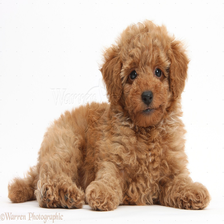

[0]


'___________________________________________________________________________________________'

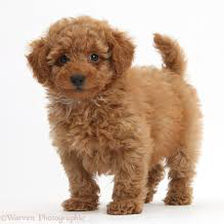

[1]


'___________________________________________________________________________________________'

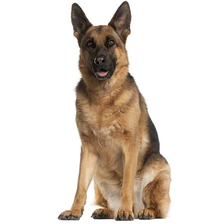

[1]


'___________________________________________________________________________________________'

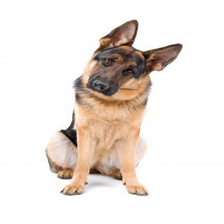

[1]


'___________________________________________________________________________________________'

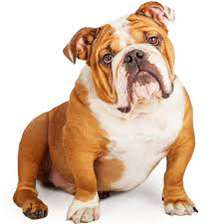

[2]


'___________________________________________________________________________________________'

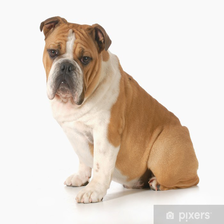

[2]


In [8]:

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://www.warrenphotographic.co.uk/photography/bigs/38746-Cute-red-Toy-Poodle-puppy-white-background.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSAk7Zvt0eF6E8j6NjToCmiN4sioKHpJVas9ELBqhmu57vtjsrY&usqp=CAU",
    "https://careguideforpets.com/wp-content/uploads/2020/01/german-shepherd-main.jpg",
    "https://archive.content.aah.net.au/files/images/german-shepherd-head-tilt.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ1meaMgJuPHbitAtfHWI2PUyuVqdt2WBKlzIMCaeuu5brCEpvR&usqp=CAU",
    "https://img.pixers.pics/pho_wat(s3:700/FO/57/85/21/98/700_FO57852198_85c778be6b2cec92c684cfc1898a7308.jpg,700,582,cms:2018/10/5bd1b6b8d04b8_220x50-watermark.png,over,480,532,jpg)/wall-murals-bulldog-puppy.jpg.jpg"
    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))
